### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the CSV file provided
ecom_data = pd.read_csv('The E-commerce Dataset.csv')

In [3]:
#display first ten rows from the dataset
ecom_data.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
5,33,30100,What is the &quot;Matrix&quot; Great Movie,Matrix,4.0,0.0,F,Movies,40,24.51,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
7,33,52800,E-commerce..what do I do???,PayPal,4.0,0.0,F,Personal Finance,52,38.00,31
8,33,52800,A man who remade himself..,Wendy's,5.0,0.0,F,Restaurants & Gourmet,84,69.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22


In [4]:
#gives the last five rows from the dataset
ecom_data.tail()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.0,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.0,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.0,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.0,27
19999,10808,10200,Boldly Displaying Sigourneys Cleavage ..,Galaxy Quest,4.0,0.0,M,Movies,29,67.0,11


In [5]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [6]:
#shape of dataframe
ecom_data.shape

(20000, 11)

In [7]:
#size of male and female
males = ecom_data[ecom_data.gender == 'M']
females = ecom_data[ecom_data.gender == 'F']
males.shape, females.shape

((10154, 11), (9819, 11))

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [8]:
# your code and solutions
#check for null values in gender
print(ecom_data.gender.isnull().values.any())
#printing sum of null values for gender
ecom_data.gender.isnull().sum()

True


27

In [9]:
#check for null values in rating
#printing sum of null values for rating
print(ecom_data.rating.isnull().values.any())
ecom_data.rating.isnull().sum()

True


17

In [10]:
#check for null values in helpfulness
#printing sum of null values for helpfulness
print(ecom_data.helpfulness.isnull().values.any())
ecom_data.helpfulness.isnull().sum()

True


22

In [11]:
#printing sum of null data for review
Review = ecom_data.review =='none' 
Review.sum()

18

In [12]:
#checking for null values in the dataframe
ecom_data.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [13]:
#print the length of the data before removing missing values
print('The length of the data before removing missing values is ', len(ecom_data))  

The length of the data before removing missing values is  20000


In [14]:
# Printing the index of review where null values are present
remove_index = (ecom_data.review.index[(ecom_data.review == 'none')])
print(remove_index)

Index([  438,  1222,  2587,  2863,  6284,  7569,  9230,  9438, 11046, 12221,
       14310, 14601, 14803, 16646, 17495, 18286, 18625, 18925],
      dtype='int64')


In [15]:
# printing and displaying the total null values present in dataframe from rating,gender, and helpfulness
indexes_with_na = ecom_data[ecom_data.isna().any(axis=1)]
print(len(indexes_with_na))
indexes_with_na.head(70)

66


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
96,4083,92100,A great time to get it!,Final Fantasy VIII for PlayStation 1,5.0,0.0,NaN,Games,27,136.05,17
111,4087,11200,A must play game,The Legend Of Zelda Ocarina Of Time for Ninten...,5.0,0.0,NaN,Games,77,59.00,1
942,4381,53001,So-so cake with great frosting,Pearl Harbor,3.0,4.0,NaN,Movies,53,141.75,16
1329,4497,52700,McLicious,McDonald's,5.0,NaN,F,Restaurants & Gourmet,41,30.74,23
1442,194,52600,Crowe Unleashed,Gladiator,NaN,0.0,M,Movies,30,65.17,8
...,...,...,...,...,...,...,...,...,...,...,...
17747,10107,81900,As addictive as Civilization II,The Sims 2: Open for Business for Windows,5.0,4.0,NaN,Games,79,27.00,0
17766,10116,112599,the best!!!,Delta Air Lines,5.0,0.0,NaN,Hotels & Travel,20,116.00,23
17773,10119,81601,There's no place quite like Las Vegas.,Las Vegas,NaN,0.0,F,Hotels & Travel,37,35.31,32
18231,10274,121599,Have Spedia? Want To Try Spedia? Read This F...,Spedia,2.0,4.0,NaN,Online Stores & Services,70,58.32,5


In [16]:
#drop the null values from the review column
new_data = ecom_data.drop(ecom_data.review.index[(ecom_data.review == 'none')])
print('The length after removing none from review is ', len(new_data)) 

The length after removing none from review is  19982


In [17]:
#display shape of new dataframe
new_data.shape

(19982, 11)

In [18]:
# remove null values from the new dataframe new_data
# print the length of the new dataframe after removing null values
clean_data = new_data.dropna()
print('The length after removing NA is ', len(clean_data)) 

The length after removing NA is  19916


In [19]:
#check for any null values in clean dataframe
clean_data.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [20]:
clean_data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [21]:
#your code and solutions
# Q2.1 total number of unique users, unique reviews, unique items, and unique categories

unique_users = clean_data['userId'].unique()
print('The number of unique users are ', len(unique_users))

unique_reviews = clean_data['review'].unique()
print('The number of unique reviews are ', len(unique_reviews))

unique_items = clean_data['item'].unique()
print('The number of unique items are ', len(unique_items))


unique_categories = clean_data['category'].unique()
print('The number of unique categories are ', len(unique_categories))


The number of unique users are  8562
The number of unique reviews are  19459
The number of unique items are  89
The number of unique categories are  9


In [22]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
clean_data.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [23]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
gender_item_num = clean_data.groupby(['gender'])['item'].count().reset_index(name='item_count_by_gender')
gender_item_num['item_count_by_gender'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item_count_by_gender, dtype: float64

In [24]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
item_rating_num = clean_data.groupby(['rating'])['item'].count().reset_index(name = 'rating_by_item')
item_rating_num['rating_by_item'].describe()

count       5.000000
mean     3983.200000
std      2540.669931
min      2212.000000
25%      2406.000000
50%      2409.000000
75%      4771.000000
max      8118.000000
Name: rating_by_item, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [25]:
#grouping gender as male and female
counts = clean_data.groupby(['gender']) 
counts.size() 

gender
F     9793
M    10123
dtype: int64

[Text(0.5, 1.0, 'Gender counts')]

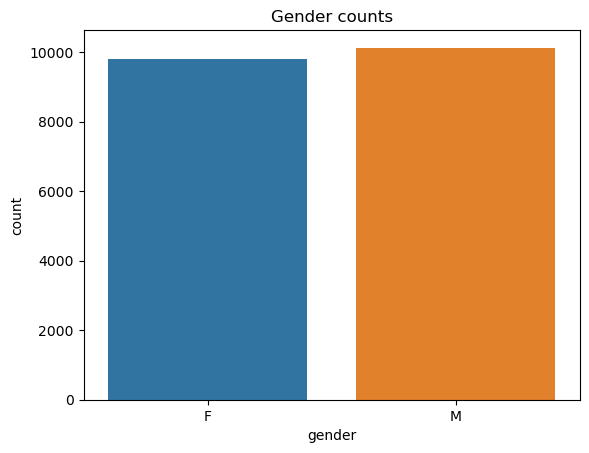

In [26]:
sns.countplot(x='gender',data=clean_data).set(title='Gender counts')

[Text(0.5, 1.0, 'Rating vs Total Count')]

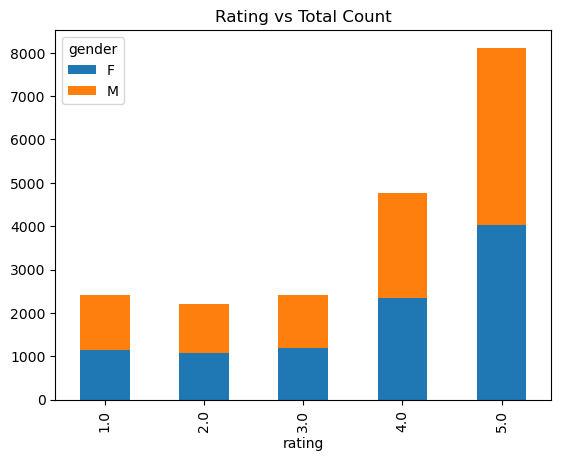

In [27]:
pd.crosstab(clean_data['rating'],clean_data['gender']).plot(kind='bar',stacked=True).set(title='Rating vs Total Count')

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

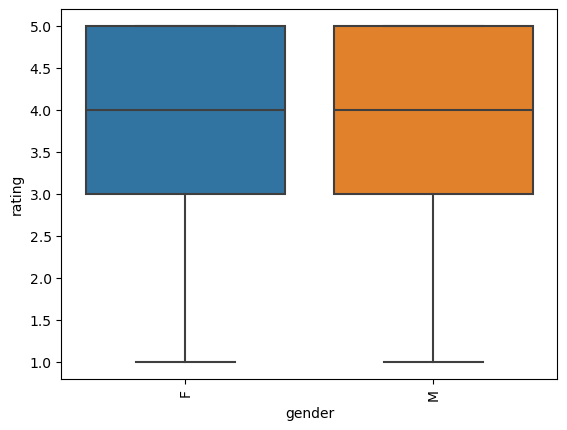

In [28]:
# your code and solutions
#gender and rating correlation
sns.boxplot(x='gender', y='rating', data=clean_data)
plt.xticks(rotation=90)

#### Analysis and Observation for Gender Vs Rating
##### From the above plots it is clear that both gender had almost equal contribution for the rating
##### Although when closely observed, total number of males who rated was more compared to those of females
##### Median for both male and female is closely same
#####


[Text(0.5, 1.0, 'Total number of rating')]

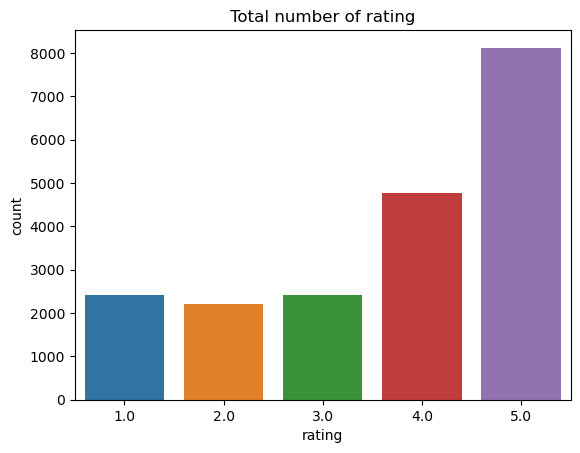

In [29]:
sns.countplot(x='rating',data=clean_data).set(title='Total number of rating')

[Text(0.5, 1.0, 'Helpfulness count')]

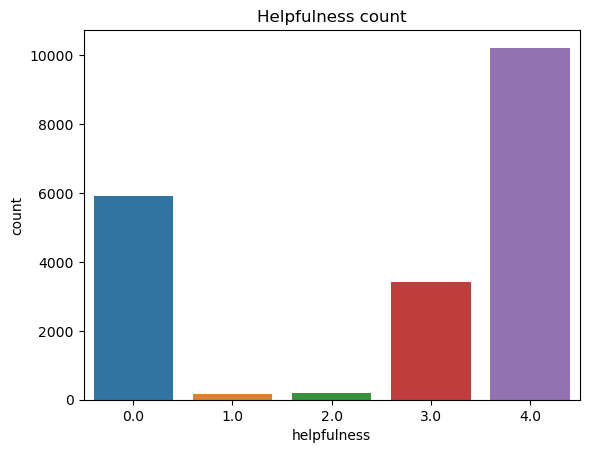

In [30]:
sns.countplot(x='helpfulness',data=clean_data).set(title='Helpfulness count')

[Text(0.5, 1.0, 'Rating count')]

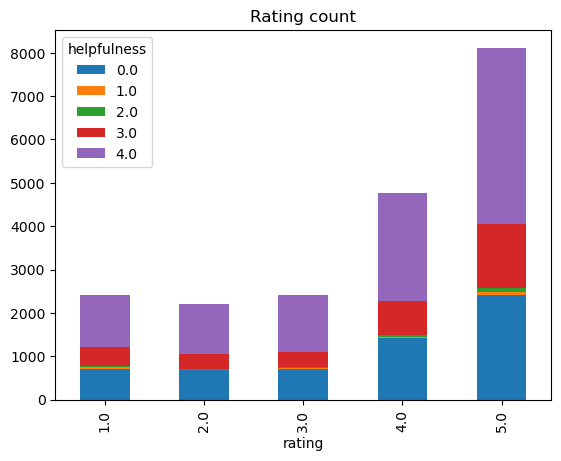

In [31]:
pd.crosstab(clean_data['rating'],clean_data['helpfulness']).plot(kind='bar',stacked=True).set(title='Rating count')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0')])

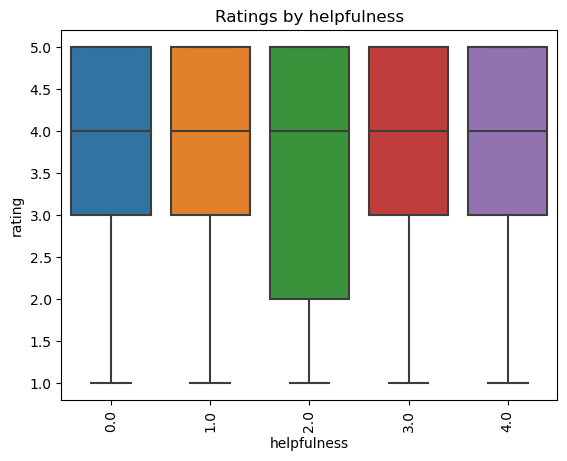

In [32]:
#helpfulness and rating correlation
sns.boxplot(x='helpfulness', y='rating', data=clean_data)
plt.title('Ratings by helpfulness')
plt.xticks(rotation=90)

#### Analysis and Observation for Helpfulness Vs Rating
##### Overall, majority of the reviews had perfect helpfulness score.
##### More than half of the review had a rating more than 3
#####

[Text(0.5, 1.0, 'Category vs Count')]

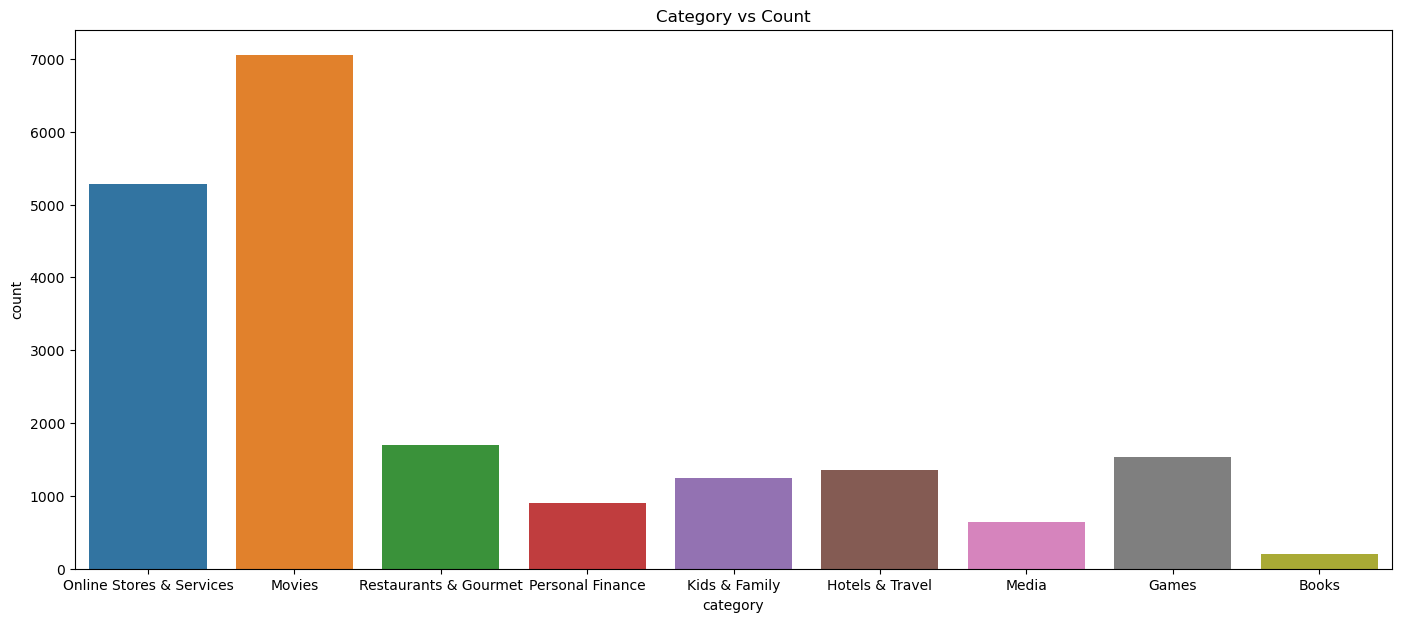

In [33]:
plt.figure(figsize=(17,7))
sns.countplot(x='category',data=clean_data).set(title='Category vs Count')

<Figure size 2500x1900 with 0 Axes>

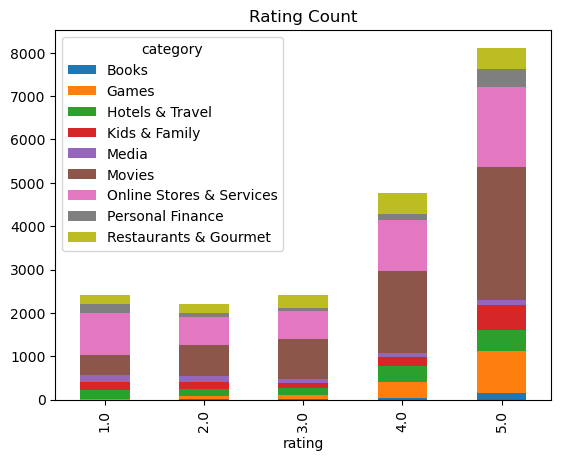

In [34]:
plt.figure(figsize=(25,19))
pd.crosstab(clean_data['rating'],clean_data['category']).plot(kind='bar',stacked=True).set(title='Rating Count')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Online Stores & Services'),
  Text(1, 0, 'Movies'),
  Text(2, 0, 'Restaurants & Gourmet'),
  Text(3, 0, 'Personal Finance'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Hotels & Travel'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Games'),
  Text(8, 0, 'Books')])

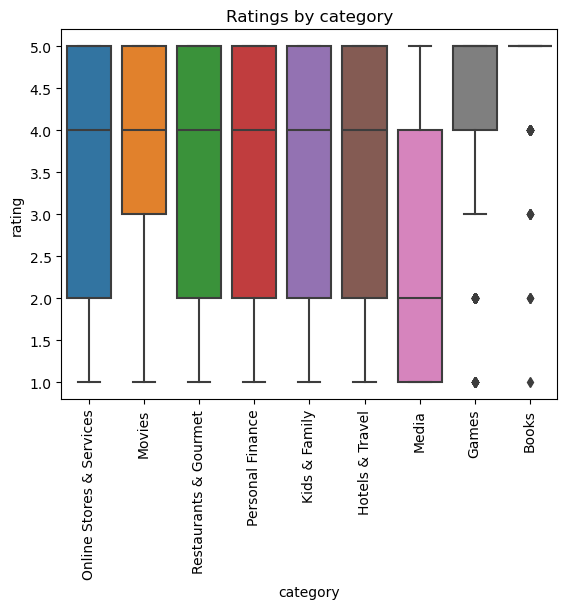

In [35]:
#category rating correlation
sns.boxplot(x='category', y='rating', data=clean_data)
plt.title('Ratings by category')
plt.xticks(rotation=90)

### Analysis and Observation for Category Vs Rating
#### From the above graph, we can observe majority of the rating was given to the movies, which is closely followed by online stores and services
#### Items with category books was rated lowest
#### 

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [36]:
#print the length of the data
len(clean_data)

19916

In [37]:
#reviews of which the helpfulness is no more than 2
review_less_than_two = clean_data.index[(clean_data['helpfulness'] <=2)]
print(review_less_than_two)
print(len(review_less_than_two))

Index([    0,     1,     5,     7,     8,    10,    16,    19,    23,    26,
       ...
       19980, 19981, 19982, 19984, 19986, 19987, 19991, 19996, 19998, 19999],
      dtype='int64', length=6273)
6273


In [38]:
# your code and solutions
#drop reviews of which the helpfulness is no more than 2
new_df = clean_data.drop(clean_data.index[(clean_data['helpfulness'] <=2)])
print('the length after removing helpless with review no more than two is', len(new_df))

the length after removing helpless with review no more than two is 13643


In [39]:
new_df.shape

(13643, 11)

In [40]:
#users who rate less than 7 items
user_counts = new_df['userId'].value_counts()
new_df = new_df[~new_df['userId'].isin(user_counts[user_counts < 7].index)]
print(len(new_df))

2741


In [41]:
new_df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [42]:
#items that receives less than 11 ratings
item_counts = new_df['item'].value_counts()
new_df = new_df[~new_df['item'].isin(item_counts[item_counts < 11].index)]
#print the length of the data
print('Length after removing outlier is',len(new_df))

Length after removing outlier is 2685


In [43]:
new_df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [44]:
new_df.shape

(2685, 11)